In [1]:
import os
os.chdir('/root/awid_dataset/')
import pandas as pd
import numpy as np
import csv
import os
import time
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 5.0)

# Read in the CSV files
dataset_columns = ['frame.interface_id',	'frame.dlt',	'frame.offset_shift',	'frame.time_epoch',	'frame.time_delta',	'frame.time_delta_displayed',	'frame.time_relative',	'frame.len',	'frame.cap_len',	'frame.marked',	'frame.ignored',	'radiotap.version',	'radiotap.pad',	'radiotap.length',	'radiotap.present.tsft',	'radiotap.present.flags',	'radiotap.present.rate',	'radiotap.present.channel',	'radiotap.present.fhss',	'radiotap.present.dbm_antsignal',	'radiotap.present.dbm_antnoise',	'radiotap.present.lock_quality',	'radiotap.present.tx_attenuation',	'radiotap.present.db_tx_attenuation',	'radiotap.present.dbm_tx_power',	'radiotap.present.antenna',	'radiotap.present.db_antsignal',	'radiotap.present.db_antnoise',	'radiotap.present.rxflags',	'radiotap.present.xchannel',	'radiotap.present.mcs',	'radiotap.present.ampdu',	'radiotap.present.vht',	'radiotap.present.reserved',	'radiotap.present.rtap_ns',	'radiotap.present.vendor_ns',	'radiotap.present.ext',	'radiotap.mactime',	'radiotap.flags.cfp',	'radiotap.flags.preamble',	'radiotap.flags.wep',	'radiotap.flags.frag',	'radiotap.flags.fcs',	'radiotap.flags.datapad',	'radiotap.flags.badfcs',	'radiotap.flags.shortgi',	'radiotap.datarate',	'radiotap.channel.freq',	'radiotap.channel.type.turbo',	'radiotap.channel.type.cck',	'radiotap.channel.type.ofdm',	'radiotap.channel.type.2ghz',	'radiotap.channel.type.5ghz',	'radiotap.channel.type.passive',	'radiotap.channel.type.dynamic',	'radiotap.channel.type.gfsk',	'radiotap.channel.type.gsm',	'radiotap.channel.type.sturbo',	'radiotap.channel.type.half',	'radiotap.channel.type.quarter',	'radiotap.dbm_antsignal',	'radiotap.antenna',	'radiotap.rxflags.badplcp',	'wlan.fc.type_subtype',	'wlan.fc.version',	'wlan.fc.type',	'wlan.fc.subtype',	'wlan.fc.ds',	'wlan.fc.frag',	'wlan.fc.retry',	'wlan.fc.pwrmgt',	'wlan.fc.moredata',	'wlan.fc.protected',	'wlan.fc.order',	'wlan.duration',	'wlan.ra',	'wlan.da',	'wlan.ta',	'wlan.sa',	'wlan.bssid',	'wlan.frag',	'wlan.seq',	'wlan.bar.type',	'wlan.ba.control.ackpolicy',	'wlan.ba.control.multitid',	'wlan.ba.control.cbitmap',	'wlan.bar.compressed.tidinfo',	'wlan.ba.bm',	'wlan.fcs_good',	'wlan_mgt.fixed.capabilities.ess',	'wlan_mgt.fixed.capabilities.ibss',	'wlan_mgt.fixed.capabilities.cfpoll.ap',	'wlan_mgt.fixed.capabilities.privacy',	'wlan_mgt.fixed.capabilities.preamble',	'wlan_mgt.fixed.capabilities.pbcc',	'wlan_mgt.fixed.capabilities.agility',	'wlan_mgt.fixed.capabilities.spec_man',	'wlan_mgt.fixed.capabilities.short_slot_time',	'wlan_mgt.fixed.capabilities.apsd',	'wlan_mgt.fixed.capabilities.radio_measurement',	'wlan_mgt.fixed.capabilities.dsss_ofdm',	'wlan_mgt.fixed.capabilities.del_blk_ack',	'wlan_mgt.fixed.capabilities.imm_blk_ack',	'wlan_mgt.fixed.listen_ival',	'wlan_mgt.fixed.current_ap',	'wlan_mgt.fixed.status_code',	'wlan_mgt.fixed.timestamp',	'wlan_mgt.fixed.beacon',	'wlan_mgt.fixed.aid',	'wlan_mgt.fixed.reason_code',	'wlan_mgt.fixed.auth.alg',	'wlan_mgt.fixed.auth_seq',	'wlan_mgt.fixed.category_code',	'wlan_mgt.fixed.htact',	'wlan_mgt.fixed.chanwidth',	'wlan_mgt.fixed.fragment',	'wlan_mgt.fixed.sequence',	'wlan_mgt.tagged.all',	'wlan_mgt.ssid',	'wlan_mgt.ds.current_channel',	'wlan_mgt.tim.dtim_count',	'wlan_mgt.tim.dtim_period',	'wlan_mgt.tim.bmapctl.multicast',	'wlan_mgt.tim.bmapctl.offset',	'wlan_mgt.country_info.environment',	'wlan_mgt.rsn.version',	'wlan_mgt.rsn.gcs.type',	'wlan_mgt.rsn.pcs.count',	'wlan_mgt.rsn.akms.count',	'wlan_mgt.rsn.akms.type',	'wlan_mgt.rsn.capabilities.preauth',	'wlan_mgt.rsn.capabilities.no_pairwise',	'wlan_mgt.rsn.capabilities.ptksa_replay_counter',	'wlan_mgt.rsn.capabilities.gtksa_replay_counter',	'wlan_mgt.rsn.capabilities.mfpr',	'wlan_mgt.rsn.capabilities.mfpc',	'wlan_mgt.rsn.capabilities.peerkey',	'wlan_mgt.tcprep.trsmt_pow',	'wlan_mgt.tcprep.link_mrg',	'wlan.wep.iv',	'wlan.wep.key',	'wlan.wep.icv',	'wlan.tkip.extiv',	'wlan.ccmp.extiv',	'wlan.qos.tid',	'wlan.qos.priority',	'wlan.qos.eosp',	'wlan.qos.ack',	'wlan.qos.amsdupresent',	'wlan.qos.buf_state_indicated',	'wlan.qos.bit4',	'wlan.qos.txop_dur_req',	'wlan.qos.buf_state_indicated',	'data.len',	'class']

print("Reading training csv file.")
df1 = pd.read_csv('awid_train_set')
df1.columns = dataset_columns
df1=df1.replace('?',0)

df1.drop([dataset_columns[i] for i in [33, 63, 67, 75, 76, 77, 78, 79, 82, 86, 87, 91, 103, 104, 105, 106, 108, 109, 111, 113, 114,118, 123, 124, 132, 133, 139,  141, 142, 143, 147 ]], axis=1, inplace=True) 

print("Reading testing csv file.")
df2 = pd.read_csv('awid_test_set')
df2.columns = dataset_columns
df2=df2.replace('?',0)

df2.drop([dataset_columns[i] for i in [33, 63, 67, 75, 76, 77, 78, 79, 82, 86, 87, 91, 103, 104, 105, 106, 108, 109, 111, 113, 114,118, 123, 124, 132, 133, 139,  141, 142, 143, 147 ]], axis=1, inplace=True)  

Reading training csv file.


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Reading testing csv file.


In [2]:
print(set(df2['class'].unique()) - set(df1['class'].unique()), set(df1['class'].unique()) - set(df2['class'].unique()))

{'authentication_request', 'probe_response'} {'chop_chop', 'cts', 'hirte', 'power_saving', 'probe_request', 'disassociation', 'rts'}


In [3]:
df = pd.concat([df1, df2])
print(len(df),len(df1),len(df2),len(df1)+len(df2))

2371216 575642 1795574 2371216


In [4]:
#max([float(i) for i in df1[dataset_columns[37]]])
#[dataset_columns[i] for i in [71, 72, 73, 74, 86, 98, 99, 100, 101, 103, 104]]
#dataset_columns.index(df1.columns[79])
print (len(df['class'].unique()),df['class'].unique())
os.chdir('/root/pathint/fig_split_mnist/')
print(os.getcwd())

17 ['normal' 'fragmentation' 'arp' 'probe_request' 'chop_chop' 'rts'
 'deauthentication' 'amok' 'beacon' 'evil_twin' 'cafe_latte' 'cts' 'hirte'
 'power_saving' 'disassociation' 'authentication_request' 'probe_response']
/root/pathint/fig_split_mnist


In [5]:
obj_df = df; 
Y_all_attacks = obj_df["class"]
#obj_df=pd.get_dummies(obj_df, columns=["class"])


X = obj_df.values[:,:-1]  #It has 17 labels 
print (X.shape)
print("Datasetset Formatting")
for j in range(0,123):
    maximum = max([float(k) for k in X[:,j]]) if  max([float(k) for k in X[:,j]]) != 0 else 1
    print(j)
    for i in range(0,len(X)):
        X[i,j] = round(float(X[i,j])/maximum,3)

(2371216, 123)
Datasetset Formatting
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122


In [6]:
print (X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train_all_attacks, Y_test_all_attacks = train_test_split(X, Y_all_attacks, test_size=0.33)
print (X_train.shape)

#['normal' 'fragmentation' 'arp' 'probe_request' 'chop_chop' 'rts' 'deauthentication' 'amok' 'beacon' 'evil_twin' 'cafe_latte' 'cts' 'hirte' 'power_saving' 'disassociation' 'authentication_request' 'probe_response']
cleanup_nums = {"normal":0, "fragmentation":1, "arp":2, "probe_request":3, "chop_chop":4, "rts":5, "deauthentication":6, "amok":7, "beacon":8, "evil_twin":9, "cafe_latte":10, "cts":11, "hirte":12, "power_saving":13, "disassociation":14, "authentication_request":15, "probe_response":16}
Y_train_all_attacks.replace(cleanup_nums,inplace=True)
Y_test_all_attacks.replace(cleanup_nums,inplace=True)

(2371216, 123)
(1588714, 123)


In [7]:
#https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_train)

df = pd.DataFrame()

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
pca_result = df.values

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.9790097  0.00884447 0.00324541]


In [7]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_train)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1588714 samples in 536.349s...
[t-SNE] Computed neighbors for 1588714 samples in 12352.679s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1588714
[t-SNE] Computed conditional probabilities for sample 2000 / 1588714
[t-SNE] Computed conditional probabilities for sample 3000 / 1588714
[t-SNE] Computed conditional probabilities for sample 4000 / 1588714
[t-SNE] Computed conditional probabilities for sample 5000 / 1588714
[t-SNE] Computed conditional probabilities for sample 6000 / 1588714
[t-SNE] Computed conditional probabilities for sample 7000 / 1588714
[t-SNE] Computed conditional probabilities for sample 8000 / 1588714
[t-SNE] Computed conditional probabilities for sample 9000 / 1588714
[t-SNE] Computed conditional probabilities for sample 10000 / 1588714
[t-SNE] Computed conditional probabilities for sample 11000 / 1588714
[t-SNE] Computed conditional probabilities for sample 12000 / 1588714
[t-SNE] Compute

[t-SNE] Computed conditional probabilities for sample 118000 / 1588714
[t-SNE] Computed conditional probabilities for sample 119000 / 1588714
[t-SNE] Computed conditional probabilities for sample 120000 / 1588714
[t-SNE] Computed conditional probabilities for sample 121000 / 1588714
[t-SNE] Computed conditional probabilities for sample 122000 / 1588714
[t-SNE] Computed conditional probabilities for sample 123000 / 1588714
[t-SNE] Computed conditional probabilities for sample 124000 / 1588714
[t-SNE] Computed conditional probabilities for sample 125000 / 1588714
[t-SNE] Computed conditional probabilities for sample 126000 / 1588714
[t-SNE] Computed conditional probabilities for sample 127000 / 1588714
[t-SNE] Computed conditional probabilities for sample 128000 / 1588714
[t-SNE] Computed conditional probabilities for sample 129000 / 1588714
[t-SNE] Computed conditional probabilities for sample 130000 / 1588714
[t-SNE] Computed conditional probabilities for sample 131000 / 1588714
[t-SNE

[t-SNE] Computed conditional probabilities for sample 236000 / 1588714
[t-SNE] Computed conditional probabilities for sample 237000 / 1588714
[t-SNE] Computed conditional probabilities for sample 238000 / 1588714
[t-SNE] Computed conditional probabilities for sample 239000 / 1588714
[t-SNE] Computed conditional probabilities for sample 240000 / 1588714
[t-SNE] Computed conditional probabilities for sample 241000 / 1588714
[t-SNE] Computed conditional probabilities for sample 242000 / 1588714
[t-SNE] Computed conditional probabilities for sample 243000 / 1588714
[t-SNE] Computed conditional probabilities for sample 244000 / 1588714
[t-SNE] Computed conditional probabilities for sample 245000 / 1588714
[t-SNE] Computed conditional probabilities for sample 246000 / 1588714
[t-SNE] Computed conditional probabilities for sample 247000 / 1588714
[t-SNE] Computed conditional probabilities for sample 248000 / 1588714
[t-SNE] Computed conditional probabilities for sample 249000 / 1588714
[t-SNE

[t-SNE] Computed conditional probabilities for sample 354000 / 1588714
[t-SNE] Computed conditional probabilities for sample 355000 / 1588714
[t-SNE] Computed conditional probabilities for sample 356000 / 1588714
[t-SNE] Computed conditional probabilities for sample 357000 / 1588714
[t-SNE] Computed conditional probabilities for sample 358000 / 1588714
[t-SNE] Computed conditional probabilities for sample 359000 / 1588714
[t-SNE] Computed conditional probabilities for sample 360000 / 1588714
[t-SNE] Computed conditional probabilities for sample 361000 / 1588714
[t-SNE] Computed conditional probabilities for sample 362000 / 1588714
[t-SNE] Computed conditional probabilities for sample 363000 / 1588714
[t-SNE] Computed conditional probabilities for sample 364000 / 1588714
[t-SNE] Computed conditional probabilities for sample 365000 / 1588714
[t-SNE] Computed conditional probabilities for sample 366000 / 1588714
[t-SNE] Computed conditional probabilities for sample 367000 / 1588714
[t-SNE

[t-SNE] Computed conditional probabilities for sample 473000 / 1588714
[t-SNE] Computed conditional probabilities for sample 474000 / 1588714
[t-SNE] Computed conditional probabilities for sample 475000 / 1588714
[t-SNE] Computed conditional probabilities for sample 476000 / 1588714
[t-SNE] Computed conditional probabilities for sample 477000 / 1588714
[t-SNE] Computed conditional probabilities for sample 478000 / 1588714
[t-SNE] Computed conditional probabilities for sample 479000 / 1588714
[t-SNE] Computed conditional probabilities for sample 480000 / 1588714
[t-SNE] Computed conditional probabilities for sample 481000 / 1588714
[t-SNE] Computed conditional probabilities for sample 482000 / 1588714
[t-SNE] Computed conditional probabilities for sample 483000 / 1588714
[t-SNE] Computed conditional probabilities for sample 484000 / 1588714
[t-SNE] Computed conditional probabilities for sample 485000 / 1588714
[t-SNE] Computed conditional probabilities for sample 486000 / 1588714
[t-SNE

[t-SNE] Computed conditional probabilities for sample 589000 / 1588714
[t-SNE] Computed conditional probabilities for sample 590000 / 1588714
[t-SNE] Computed conditional probabilities for sample 591000 / 1588714
[t-SNE] Computed conditional probabilities for sample 592000 / 1588714
[t-SNE] Computed conditional probabilities for sample 593000 / 1588714
[t-SNE] Computed conditional probabilities for sample 594000 / 1588714
[t-SNE] Computed conditional probabilities for sample 595000 / 1588714
[t-SNE] Computed conditional probabilities for sample 596000 / 1588714
[t-SNE] Computed conditional probabilities for sample 597000 / 1588714
[t-SNE] Computed conditional probabilities for sample 598000 / 1588714
[t-SNE] Computed conditional probabilities for sample 599000 / 1588714
[t-SNE] Computed conditional probabilities for sample 600000 / 1588714
[t-SNE] Computed conditional probabilities for sample 601000 / 1588714
[t-SNE] Computed conditional probabilities for sample 602000 / 1588714
[t-SNE

[t-SNE] Computed conditional probabilities for sample 706000 / 1588714
[t-SNE] Computed conditional probabilities for sample 707000 / 1588714
[t-SNE] Computed conditional probabilities for sample 708000 / 1588714
[t-SNE] Computed conditional probabilities for sample 709000 / 1588714
[t-SNE] Computed conditional probabilities for sample 710000 / 1588714
[t-SNE] Computed conditional probabilities for sample 711000 / 1588714
[t-SNE] Computed conditional probabilities for sample 712000 / 1588714
[t-SNE] Computed conditional probabilities for sample 713000 / 1588714
[t-SNE] Computed conditional probabilities for sample 714000 / 1588714
[t-SNE] Computed conditional probabilities for sample 715000 / 1588714
[t-SNE] Computed conditional probabilities for sample 716000 / 1588714
[t-SNE] Computed conditional probabilities for sample 717000 / 1588714
[t-SNE] Computed conditional probabilities for sample 718000 / 1588714
[t-SNE] Computed conditional probabilities for sample 719000 / 1588714
[t-SNE

[t-SNE] Computed conditional probabilities for sample 823000 / 1588714
[t-SNE] Computed conditional probabilities for sample 824000 / 1588714
[t-SNE] Computed conditional probabilities for sample 825000 / 1588714
[t-SNE] Computed conditional probabilities for sample 826000 / 1588714
[t-SNE] Computed conditional probabilities for sample 827000 / 1588714
[t-SNE] Computed conditional probabilities for sample 828000 / 1588714
[t-SNE] Computed conditional probabilities for sample 829000 / 1588714
[t-SNE] Computed conditional probabilities for sample 830000 / 1588714
[t-SNE] Computed conditional probabilities for sample 831000 / 1588714
[t-SNE] Computed conditional probabilities for sample 832000 / 1588714
[t-SNE] Computed conditional probabilities for sample 833000 / 1588714
[t-SNE] Computed conditional probabilities for sample 834000 / 1588714
[t-SNE] Computed conditional probabilities for sample 835000 / 1588714
[t-SNE] Computed conditional probabilities for sample 836000 / 1588714
[t-SNE

[t-SNE] Computed conditional probabilities for sample 940000 / 1588714
[t-SNE] Computed conditional probabilities for sample 941000 / 1588714
[t-SNE] Computed conditional probabilities for sample 942000 / 1588714
[t-SNE] Computed conditional probabilities for sample 943000 / 1588714
[t-SNE] Computed conditional probabilities for sample 944000 / 1588714
[t-SNE] Computed conditional probabilities for sample 945000 / 1588714
[t-SNE] Computed conditional probabilities for sample 946000 / 1588714
[t-SNE] Computed conditional probabilities for sample 947000 / 1588714
[t-SNE] Computed conditional probabilities for sample 948000 / 1588714
[t-SNE] Computed conditional probabilities for sample 949000 / 1588714
[t-SNE] Computed conditional probabilities for sample 950000 / 1588714
[t-SNE] Computed conditional probabilities for sample 951000 / 1588714
[t-SNE] Computed conditional probabilities for sample 952000 / 1588714
[t-SNE] Computed conditional probabilities for sample 953000 / 1588714
[t-SNE

[t-SNE] Computed conditional probabilities for sample 1058000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1059000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1060000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1061000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1062000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1063000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1064000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1065000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1066000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1067000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1068000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1069000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1070000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1071000 / 

[t-SNE] Computed conditional probabilities for sample 1173000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1174000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1175000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1176000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1177000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1178000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1179000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1180000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1181000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1182000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1183000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1184000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1185000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1186000 / 

[t-SNE] Computed conditional probabilities for sample 1289000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1290000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1291000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1292000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1293000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1294000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1295000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1296000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1297000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1298000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1299000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1300000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1301000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1302000 / 

[t-SNE] Computed conditional probabilities for sample 1403000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1404000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1405000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1406000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1407000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1408000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1409000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1410000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1411000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1412000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1413000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1414000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1415000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1416000 / 

[t-SNE] Computed conditional probabilities for sample 1518000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1519000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1520000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1521000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1522000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1523000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1524000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1525000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1526000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1527000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1528000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1529000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1530000 / 1588714
[t-SNE] Computed conditional probabilities for sample 1531000 / 

In [8]:
%load_ext autoreload
%autoreload 2
%pylab inline

import tensorflow as tf
slim = tf.contrib.slim
graph_replace = tf.contrib.graph_editor.graph_replace

import sys, os
sys.path.extend([os.path.expanduser('..')])
from pathint import utils
import seaborn as sns
sns.set_style("ticks")

from tqdm import trange, tqdm

# import operator
import matplotlib.colors as colors
import matplotlib.cm as cmx

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

select = tf.select if hasattr(tf, 'select') else tf.where

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['maximum', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
# Data params
input_dim = 3
output_dim = 17

# Network params
n_hidden_units = 123
activation_fn = tf.nn.relu

# Optimization params
batch_size = 64
epochs_per_task = 10

n_stats = 1

# Reset optimizer after each age
reset_optimizer = True

In [10]:
from keras.utils import np_utils

#task_labels = [[8,1],[5,3],[4,9], [11,7], [6,2], [0,10], [14,2],[12,13]]
task_labels = [[0,1,2],[3,4,5],[6,7,8],[9,10,11],[12,13,14],[15,16]]
#task_labels = [[0,9], [7,8], [3,6], [1,4], [2,5]]
#task_labels = [[0,1,2], [3,4,5], [6,7,8,9]]
#task_labels = [[1,5,8],[2,5,7,9],[3,4,6]]
n_tasks = len(task_labels)
nb_classes  = 17
training_datasets = []
validation_datasets = []
multihead=False

for labels in task_labels:
    idx = np.in1d(Y_train_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = pca_result[idx], np_utils.to_categorical(label_map[Y_train_all_attacks[idx]], len(labels))
    else:
        data = pca_result[idx], np_utils.to_categorical(Y_train_all_attacks[idx], nb_classes)
        training_datasets.append(data)

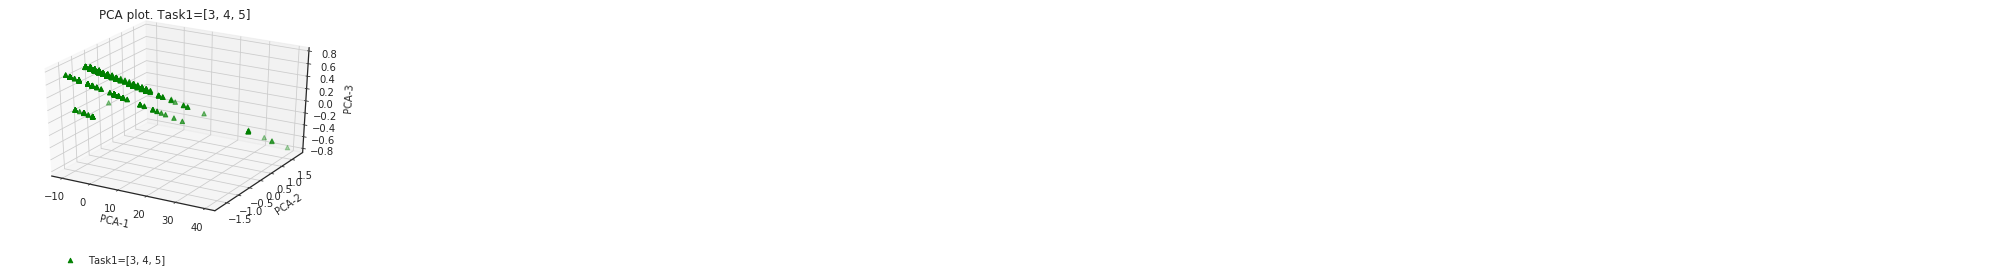

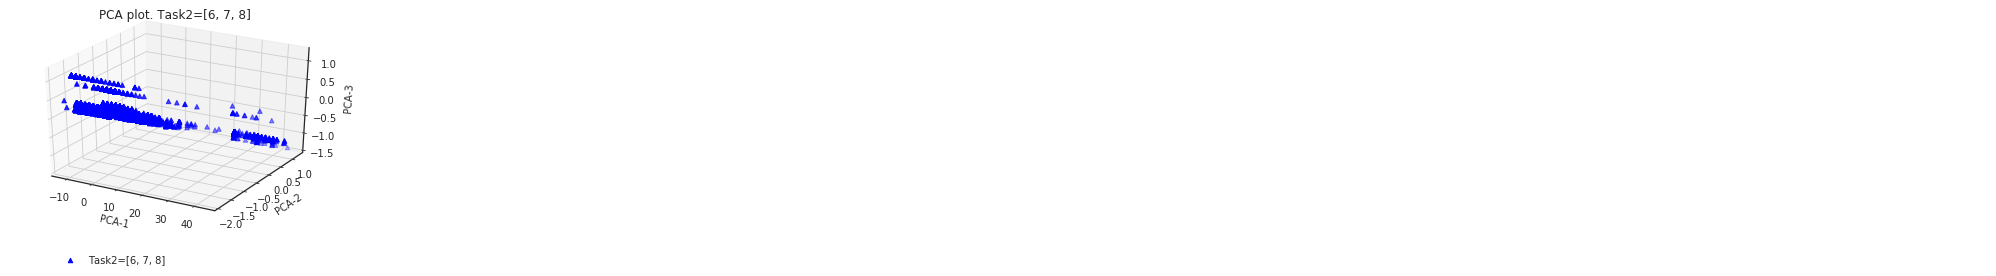

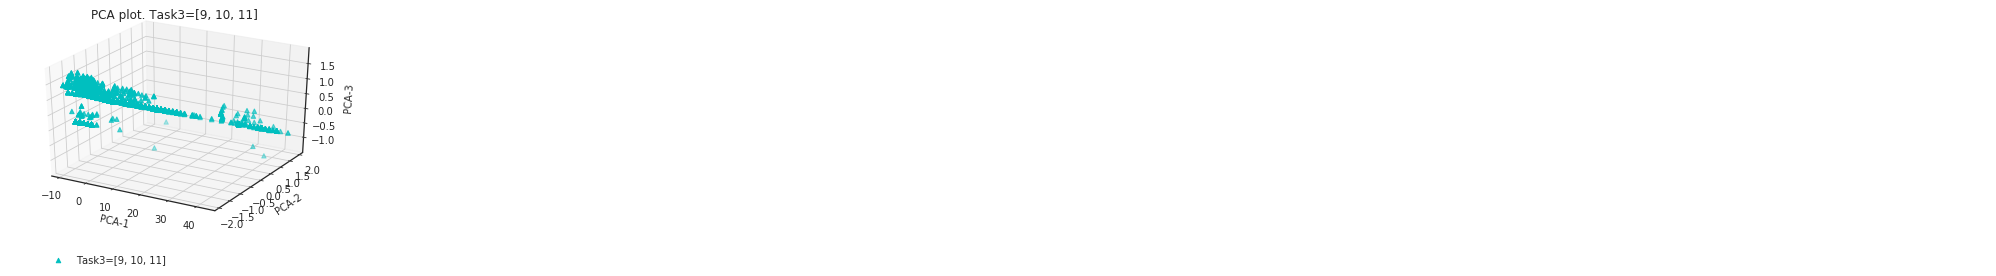

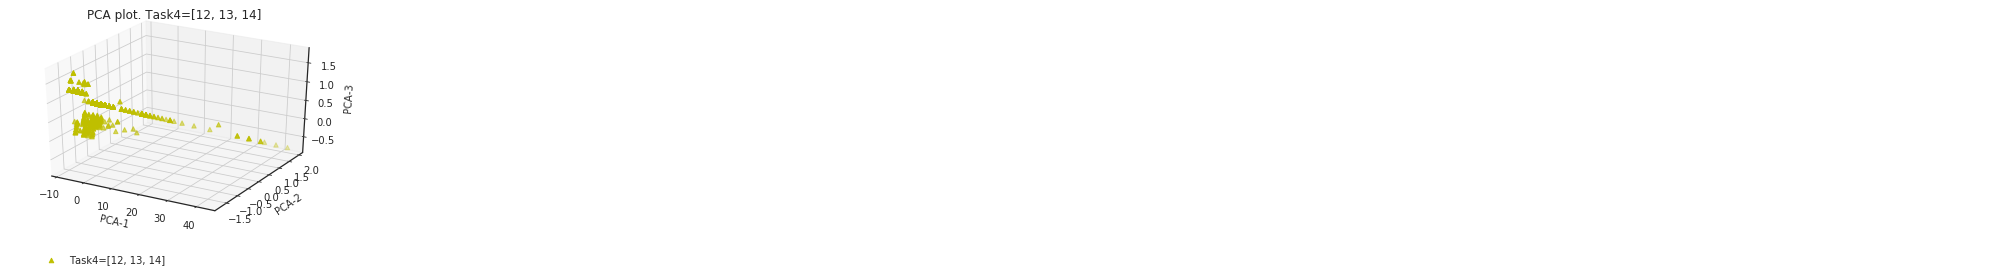

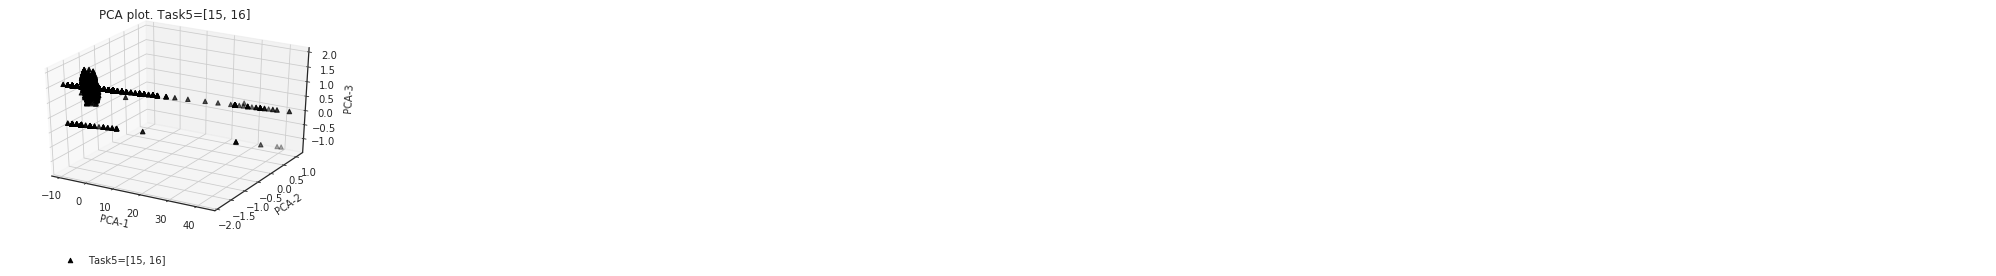

{'probe_response': 16, 'cts': 11, 'cafe_latte': 10, 'evil_twin': 9, 'disassociation': 14, 'arp': 2, 'beacon': 8, 'amok': 7, 'power_saving': 13, 'chop_chop': 4, 'fragmentation': 1, 'deauthentication': 6, 'normal': 0, 'hirte': 12, 'rts': 5, 'probe_request': 3, 'authentication_request': 15}


In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

C=['r','g','b','c','y','k']

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i in [1,2,3,4,5]:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xs = training_datasets[i][0][:,0]
    ys = training_datasets[i][0][:,1]
    zs = training_datasets[i][0][:,2]
    ax.scatter(xs, ys, zs, c=C[i], marker='^', label = 'Task'+str(i)+ "="+str(task_labels[i]))

    ax.set_xlabel('PCA-1')
    ax.set_ylabel('PCA-2')
    ax.set_zlabel('PCA-3')
    ax.legend(bbox_to_anchor=(0.5, -0.1))
    ax.set_title('PCA plot. Task'+str(i)+ "="+str(task_labels[i]))
    plt.savefig('pca-awid-task'+str(i)+'.pdf')

plt.show()
print(cleanup_nums)

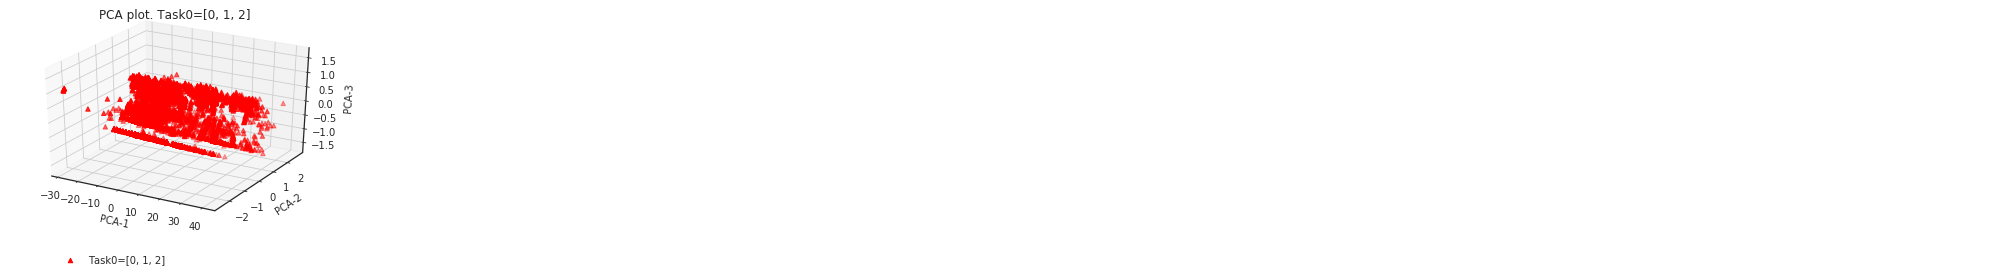

{'deauthentication': 6, 'arp': 2, 'fragmentation': 1, 'amok': 7, 'hirte': 12, 'normal': 0, 'probe_response': 16, 'disassociation': 14, 'cts': 11, 'authentication_request': 15, 'rts': 5, 'chop_chop': 4, 'probe_request': 3, 'beacon': 8, 'cafe_latte': 10, 'evil_twin': 9, 'power_saving': 13}


In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

C=['r','g','b','c','y','k']

for i in [0]:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xs = training_datasets[i][0][:13371,0]
    ys = training_datasets[i][0][:13371,1]
    zs = training_datasets[i][0][:13371,2]
    ax.scatter(xs, ys, zs, c=C[i], marker='^', label = 'Task'+str(i)+ "="+str(task_labels[i]))

    ax.set_xlabel('PCA-1')
    ax.set_ylabel('PCA-2')
    ax.set_zlabel('PCA-3')
    ax.legend(bbox_to_anchor=(0.5, -0.1))
    ax.set_title('PCA plot. Task'+str(i)+ "="+str(task_labels[i]))
    plt.savefig('pca-awid-task'+str(i)+'.pdf')

plt.show()
print(cleanup_nums)

In [10]:
from keras.utils import np_utils

#task_labels = [[8,1],[5,3],[4,9], [11,7], [6,2], [0,10], [14,2],[12,13]]
task_labels = [[0,1,2],[3,4,5],[6,7,8],[9,10,11],[12,13,14],[15,16]]
#task_labels = [[0,9], [7,8], [3,6], [1,4], [2,5]]
#task_labels = [[0,1,2], [3,4,5], [6,7,8,9]]
#task_labels = [[1,5,8],[2,5,7,9],[3,4,6]]
n_tasks = len(task_labels)
nb_classes  = 17
training_datasets = []
validation_datasets = []
multihead=False
               
for labels in task_labels:
    idx = np.in1d(Y_train_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = tsne_results[idx], np_utils.to_categorical(label_map[Y_train_all_attacks[idx]], len(labels))
    else:
        data = tsne_results[idx], np_utils.to_categorical(Y_train_all_attacks[idx], nb_classes)
        training_datasets.append(data)

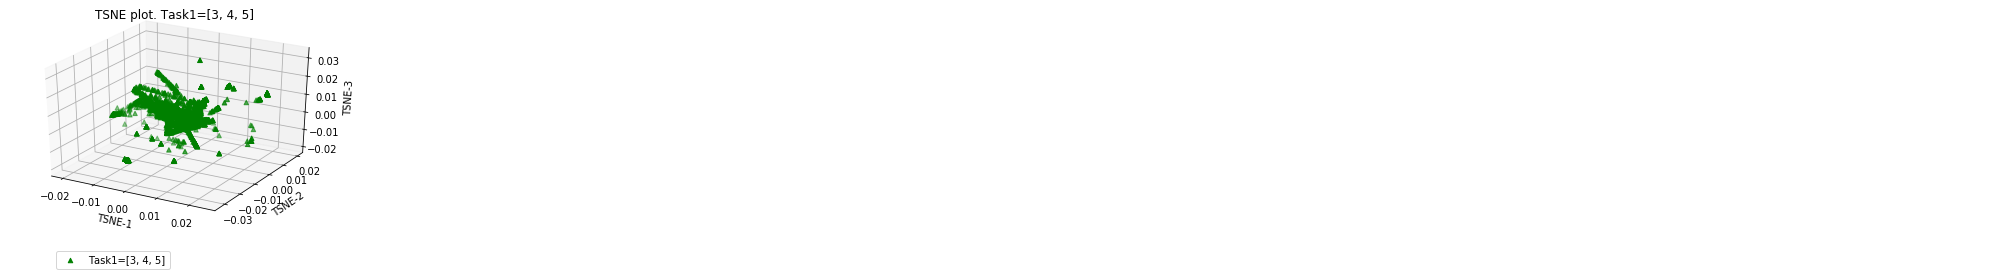

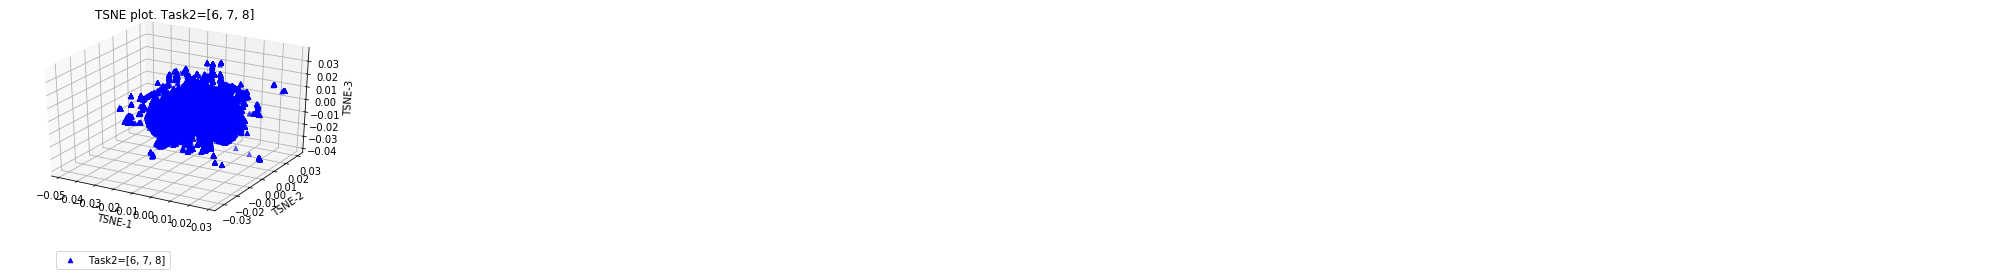

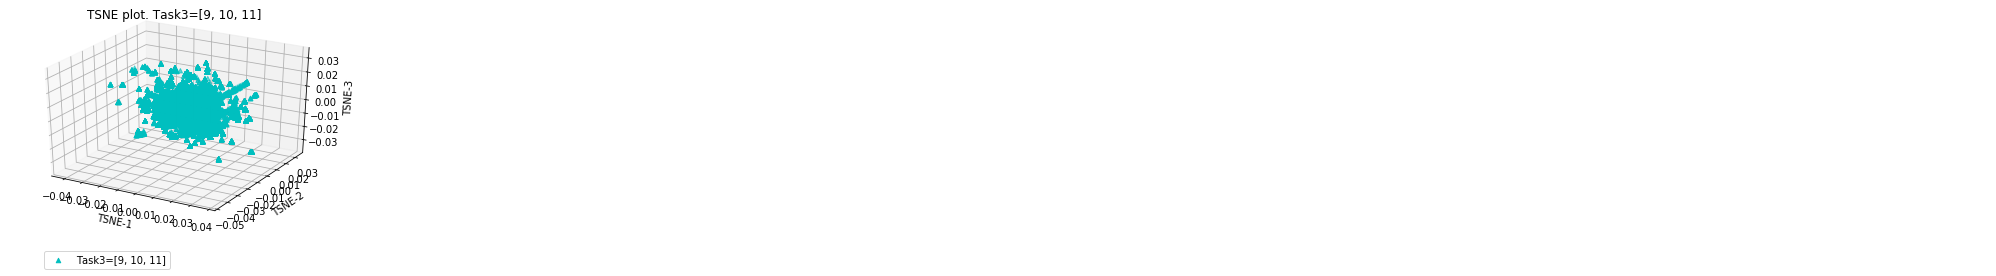

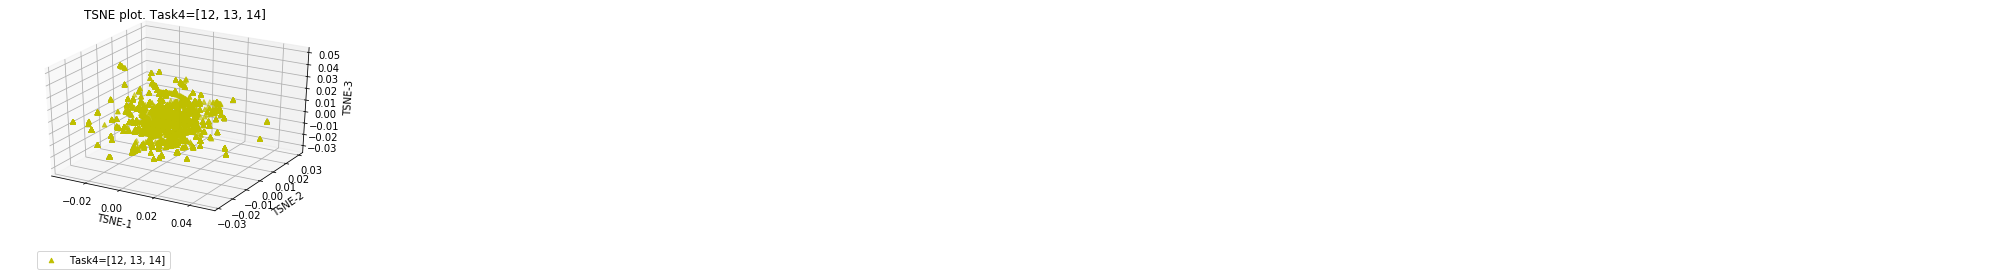

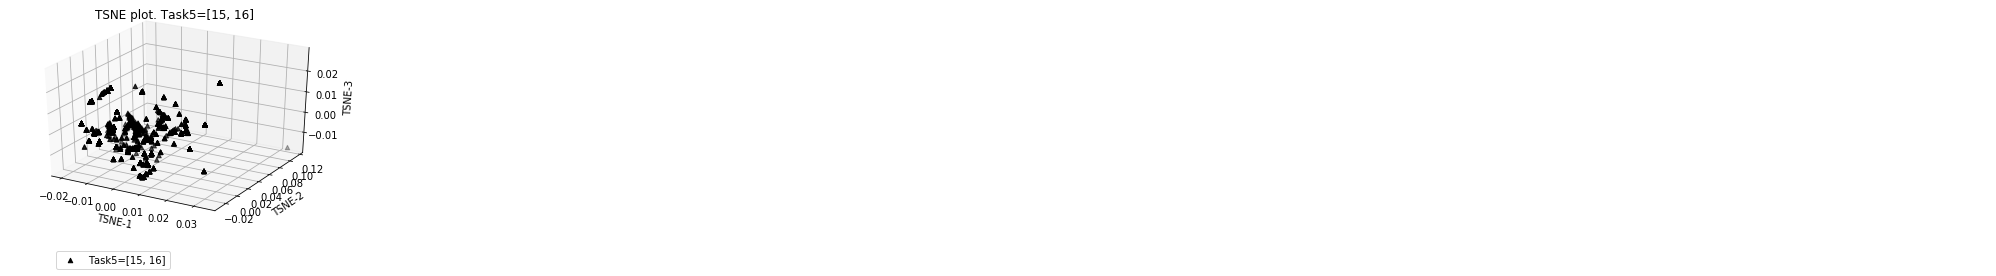

{'evil_twin': 9, 'arp': 2, 'rts': 5, 'probe_response': 16, 'normal': 0, 'disassociation': 14, 'amok': 7, 'deauthentication': 6, 'probe_request': 3, 'authentication_request': 15, 'cafe_latte': 10, 'power_saving': 13, 'beacon': 8, 'hirte': 12, 'chop_chop': 4, 'cts': 11, 'fragmentation': 1}


In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

C=['r','g','b','c','y','k']

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i in [1,2,3,4,5]:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xs = training_datasets[i][0][:,0]
    ys = training_datasets[i][0][:,1]
    zs = training_datasets[i][0][:,2]
    ax.scatter(xs, ys, zs, c=C[i], marker='^', label = 'Task'+str(i)+ "="+str(task_labels[i]))

    ax.set_xlabel('TSNE-1')
    ax.set_ylabel('TSNE-2')
    ax.set_zlabel('TSNE-3')
    ax.legend(bbox_to_anchor=(0.5, -0.1))
    ax.set_title('TSNE plot. Task'+str(i)+ "="+str(task_labels[i]))
    plt.savefig('TSNE-awid-task'+str(i)+'.pdf')

plt.show()
print(cleanup_nums)

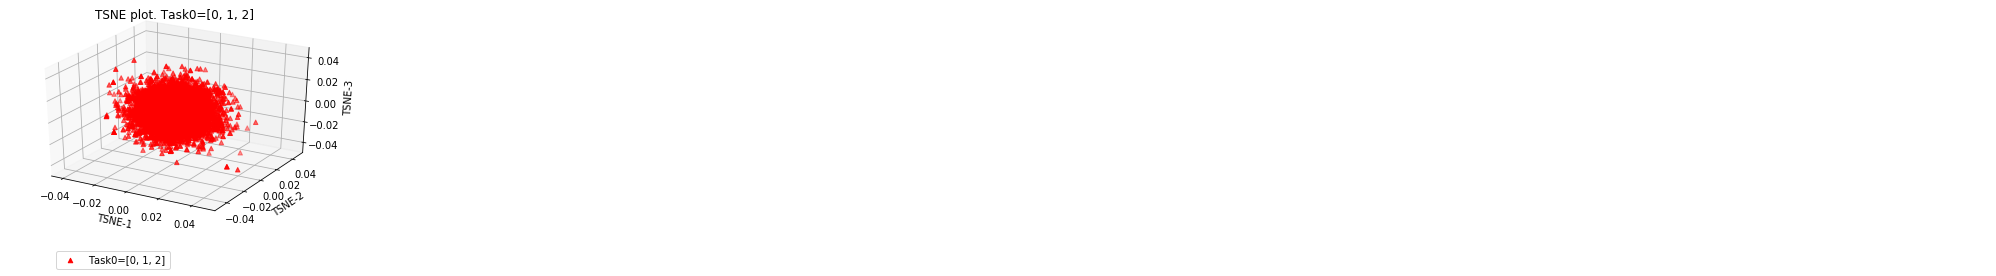

{'evil_twin': 9, 'arp': 2, 'rts': 5, 'probe_response': 16, 'normal': 0, 'disassociation': 14, 'amok': 7, 'deauthentication': 6, 'probe_request': 3, 'authentication_request': 15, 'cafe_latte': 10, 'power_saving': 13, 'beacon': 8, 'hirte': 12, 'chop_chop': 4, 'cts': 11, 'fragmentation': 1}


In [12]:
for i in [0]:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xs = training_datasets[i][0][:13371,0]
    ys = training_datasets[i][0][:13371,1]
    zs = training_datasets[i][0][:13371,2]
    ax.scatter(xs, ys, zs, c=C[i], marker='^', label = 'Task'+str(i)+ "="+str(task_labels[i]))

    ax.set_xlabel('TSNE-1')
    ax.set_ylabel('TSNE-2')
    ax.set_zlabel('TSNE-3')
    ax.legend(bbox_to_anchor=(0.5, -0.1))
    ax.set_title('TSNE plot. Task'+str(i)+ "="+str(task_labels[i]))
    plt.savefig('TSNE-awid-task'+str(i)+'.pdf')

plt.show()
print(cleanup_nums)

In [8]:
from keras.utils import np_utils

#task_labels = [[8,1],[5,3],[4,9], [11,7], [6,2], [0,10], [14,2],[12,13]]
task_labels = [[0,1,2],[3,4,5],[6,7,8],[9,10,11],[12,13,14],[15,16]]
#task_labels = [[0,9], [7,8], [3,6], [1,4], [2,5]]
#task_labels = [[0,1,2], [3,4,5], [6,7,8,9]]
#task_labels = [[1,5,8],[2,5,7,9],[3,4,6]]
n_tasks = len(task_labels)
nb_classes  = 17
training_datasets = []
validation_datasets = []
multihead=False

for labels in task_labels:
    idx = np.in1d(Y_train_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_train[idx], np_utils.to_categorical(label_map[Y_train_all_attacks[idx]], len(labels))
    else:
        data = X_train[idx], np_utils.to_categorical(Y_train_all_attacks[idx], nb_classes)
        training_datasets.append(data)

In [10]:
#https://github.com/OFAI/hub-toolbox-python3/blob/master/hub_toolbox/IntrinsicDim.py
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
This file is part of the HUB TOOLBOX available at
http://ofai.at/research/impml/projects/hubology.html
Source code is available at
https://github.com/OFAI/hub-toolbox-python3/
The HUB TOOLBOX is licensed under the terms of the GNU GPLv3.
(c) 2011-2016, Dominik Schnitzer and Roman Feldbauer
Austrian Research Institute for Artificial Intelligence (OFAI)
Contact: <roman.feldbauer@ofai.at>
This file is based on a Matlab script by Elizaveta Levina, University of 
Michigan, available at http://dept.stat.lsa.umich.edu/~elevina/mledim.m
Reference:  E. Levina and P.J. Bickel (2005).  
 "Maximum Likelihood Estimation  of Intrinsic Dimension."  
 In Advances in NIPS 17, Eds. L. K. Saul, Y. Weiss, L. Bottou. 
"""
import sys
import numpy as np
import pdb

def intrinsic_dimension(X:np.ndarray, k1:int=6, k2:int=12, 
                        estimator:str='levina', metric:str='vector', 
                        trafo:str='var', mem_threshold:int=5000):
    """Calculate intrinsic dimension based on the MLE by Levina and Bickel [1]_.
    
    Parameters
    ----------
    X : ndarray
        - An ``m x n`` vector data matrix with ``n`` objects in an 
          ``m`` dimensional feature space 
        - An ``n x n`` distance matrix.
        
        NOTE: The type must be defined via parameter `metric`!
        
    k1 : int, optional (default: 6)
        Start of neighborhood range to search in.
        
    k2 : int, optional (default: 12)
        End of neighborhood range to search in.
        
    estimator : {'levina', 'mackay'}, optional (default: 'levina')
        Determine the summation strategy: see [2]_.
    
    metric : {'vector', 'distance'}, optional (default: 'vector')
        Determine data type of `X`. 
        
        NOTE: the MLE was derived for euclidean distances. Using 
        other dissimilarity measures may lead to undefined results.
        
    trafo : {None, 'std', 'var'}, optional (default: 'var')
        Transform vector data. 
        
        - None: no transformation
        - 'std': standardization 
        - 'var': subtract mean, divide by variance (default behavior of 
          Laurens van der Maaten's DR toolbox; most likely for other 
          ID/DR techniques).
    mem_treshold : int, optional, default: 5000
        Controls speed-memory usage trade-off: If number of points is higher
        than the given value, don't calculate complete distance matrix at
        once (fast, high memory), but per row (slower, less memory).
    Returns
    -------
    d_mle : int
        Intrinsic dimension estimate (rounded to next integer)
    
    References
    ----------
    .. [1] Levina, E., & Bickel, P. (2004). Maximum likelihood estimation of 
           intrinsic dimension. Advances in Neural Information …, 17, 777–784. 
           http://doi.org/10.2307/2335172
    .. [2] http://www.inference.phy.cam.ac.uk/mackay/dimension/
    """
    n = X.shape[0]
    if estimator not in ['levina', 'mackay']:
        raise ValueError("Parameter 'estimator' must be 'levina' or 'mackay'.")
    if k1 < 1 or k2 < k1 or k2 >= n:
        raise ValueError("Invalid neighborhood: Please make sure that "
                         "0 < k1 <= k2 < n. (Got k1={} and k2={}).".
                         format(k1, k2))
    X = X.copy().astype(float)
        
    if metric == 'vector':
        # New array with unique rows   
        X = X[np.lexsort(np.fliplr(X).T)]
        
        if trafo is None:
            pass
        elif trafo == 'var':
            X -= X.mean(axis=0) # broadcast
            X /= X.var(axis=0) + 1e-7 # broadcast
        elif trafo == 'std':
            # Standardization
            X -= X.mean(axis=0) # broadcast
            X /= X.std(axis=0) + 1e-7 # broadcast
        else:
            raise ValueError("Transformation must be None, 'std', or 'var'.")
        
        # Compute matrix of log nearest neighbor distances
        X2 = (X**2).sum(1)
        
        
        distance = X2.reshape(-1, 1) + X2 - 2*np.dot(X, X.T) #2x br.cast
        distance.sort(1)
        # Replace invalid values with a small number
        distance[distance<=0] = 1e-7
        
        try:
            knnmatrix = .5 * np.log(distance[:, 1:k2+1])
        except:
            print('log caluclation error')
        
    
    elif metric == 'distance':
        raise NotImplementedError("ID currently only supports vector data.")
        #=======================================================================
        # # TODO calculation WRONG
        # X.sort(1)
        # X[X < 0] = 1e-7
        # knnmatrix = np.log(X[:, 1:k2+1])
        #=======================================================================
    elif metric == 'similarity':
        raise NotImplementedError("ID currently only supports vector data.")
        #=======================================================================
        # # TODO calculation WRONG
        # print("WARNING: using similarity data may return "
        #       "undefined results.", file=sys.stderr)
        # X[X < 0] = 0
        # distance = 1 - (X / X.max())
        # knnmatrix = np.log(distance[:, 1:k2+1])
        #=======================================================================
    else:
        raise ValueError("Parameter 'metric' must be 'vector' or 'distance'.")
    
    # Compute the ML estimate
    S = np.cumsum(knnmatrix, 1)
    indexk = np.arange(k1, k2+1) # broadcasted afterwards
    try:
        dividor = S[:, k1-1:k2] - knnmatrix[:, k1-1:k2] * indexk
        dhat = -(indexk - 2) / dividor
        dhat[dhat < -n] = 0
        dhat[dhat > n] = 0
    except:
        print('dhat calculation error')
    
    if estimator == 'levina':  
        # Average over estimates and over values of k
        no_dims = dhat.mean()
    if estimator == 'mackay':
        # Average over inverses
        dhat **= -1
        dhat_k = dhat.mean(0)
        no_dims = (dhat_k ** -1).mean()       
    no_dims = np.nan_to_num(no_dims)
    return int(no_dims.round())
    

class IntrinsicDim(): # pragma: no cover
    """
    .. note:: Deprecated in hub-toolbox 2.3
              Class will be removed in hub-toolbox 3.0.
              Please use static functions instead.
    """
       
    def __init__(self, X, data_type='vector'):
        """
        .. note:: Deprecated in hub-toolbox 2.3
                  Class will be removed in hub-toolbox 3.0.
                  Please use static functions instead.
        """
        # Deep copy required due to changes in vector data
        self.X = X.copy()
        if data_type in ['vector', 'distance', 'similarity']:
            self.data_type = data_type
            if data_type != 'vector':
                raise NotImplementedError("IntrinsicDim currently only "
                                          "supports vector data.")
        else:
            raise ValueError("Parameter data_type must be 'vector', 'distance'"
                             " , or 'similarity'. Got '{}' instead.".
                             format(data_type.__str__())) 

    def calculate_intrinsic_dimensionality(self, k1=6, k2=12, 
                                           estimator='levina'):
        """
        .. note:: Deprecated in hub-toolbox 2.3
                  Class will be removed in hub-toolbox 3.0.
                  Please use static functions instead.
        """
        print("DEPRECATED: Please use IntrinsicDim.intrinsic_dimension().", 
              file=sys.stderr)
        return intrinsic_dimension(self.X, k1, k2, estimator, self.data_type)
    
if __name__ == '__main__':
    for i in range(n_tasks):
        VECT_DATA = training_datasets[i][0]
        m_dim = VECT_DATA.shape[0]
        n_dim = VECT_DATA.shape[1]
        window_size = 50000
        if m_dim > window_size:
            m_dim = window_size
            VECT_DATA = VECT_DATA[:window_size,:]
        id_ = intrinsic_dimension(VECT_DATA, trafo=None)
        print("Task {}, {}x{} matrix: ID_MLE = {}".format(i,m_dim, n_dim, id_))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:143: RuntimeWarning: divide by zero encountered in true_divide


Task 0, 50000x123 matrix: ID_MLE = 4
Task 1, 2288x123 matrix: ID_MLE = 3
Task 2, 32905x123 matrix: ID_MLE = 1
Task 3, 34476x123 matrix: ID_MLE = 1
Task 4, 12924x123 matrix: ID_MLE = 3
Task 5, 3375x123 matrix: ID_MLE = 4


In [8]:
#Variance of each task's pca
from keras.utils import np_utils

#task_labels = [[8,1],[5,3],[4,9], [11,7], [6,2], [0,10], [14,2],[12,13]]
task_labels = [[0,1,2],[3,4,5],[6,7,8],[9,10,11],[12,13,14],[15,16]]
#task_labels = [[0,9], [7,8], [3,6], [1,4], [2,5]]
#task_labels = [[0,1,2], [3,4,5], [6,7,8,9]]
#task_labels = [[1,5,8],[2,5,7,9],[3,4,6]]
n_tasks = len(task_labels)
nb_classes  = 17
training_datasets = []
validation_datasets = []
multihead=False

for labels in task_labels:
    idx = np.in1d(Y_train_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_train[idx], np_utils.to_categorical(label_map[Y_train_all_attacks[idx]], len(labels))
    else:
        data = X_train[idx], np_utils.to_categorical(Y_train_all_attacks[idx], nb_classes)
        training_datasets.append(data)

from sklearn.decomposition import PCA        
for i in range(n_tasks):
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(training_datasets[i][0])

    df = pd.DataFrame()

    df['pca-one'] = pca_result[:,0]
    df['pca-two'] = pca_result[:,1] 
    df['pca-three'] = pca_result[:,2]
    pca_result = df.values

    print('Task {} Explained variation per principal component: {}'.format(i,pca.explained_variance_ratio_))

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Task 0 Explained variation per principal component: [0.98031846 0.00841948 0.00313612]
Task 1 Explained variation per principal component: [0.98387651 0.01385621 0.00214732]
Task 2 Explained variation per principal component: [0.99491949 0.00259484 0.00122916]
Task 3 Explained variation per principal component: [0.96907132 0.02175656 0.00583948]
Task 4 Explained variation per principal component: [0.92895676 0.05536143 0.00664126]
Task 5 Explained variation per principal component: [0.96055866 0.0157996  0.00574951]
